## Business Understanding

### Objectives
<ol>
<li>Data Understanding</li>
<li>Data cleaning</li>
<li>Data preparation</li>
<li>Explanatory Data Analysis</li>
<li>Modelling</li>
<li>Evaluation</li>
<li>Conclusion</li>
<li>Recommendatons</li>
</ol>

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz

import warnings
warnings.filterwarnings('ignore')



In [2]:
pd.set_option('display.max_columns' ,None)

In [3]:
# Read in the data
main_df = pd.read_csv('HR_comma_sep.csv')
main_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
# preview the data
main_df.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
# preview the data

main_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
10258,0.54,0.52,3,115,3,0,0,0,accounting,low
11404,0.69,0.58,4,149,3,0,0,1,marketing,medium
5471,0.86,0.92,3,180,2,0,0,0,support,medium
11265,0.18,0.75,3,142,2,0,0,0,product_mng,low
14348,0.42,0.48,2,129,3,0,1,0,management,low
8762,0.91,0.67,5,137,3,0,0,0,management,medium
2338,0.64,0.53,4,163,3,0,0,0,support,medium
12982,0.97,0.74,4,209,2,0,0,0,sales,low
10510,0.37,0.52,4,151,2,0,0,0,support,medium
4454,0.81,0.61,4,142,4,0,0,0,sales,low


In [6]:
# statistical summary of the data
main_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Understanding

In [7]:
# understanding the data
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
# check the data types
main_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
# checking the shape  of the dataset
main_df.shape

(14999, 10)

In [10]:
# checking columns
main_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [11]:
#! pip install sweetviz

In [104]:
! ls

HR_comma_sep.csv               analyze.html
Human Resource Case Study.docx index.ipynb
__pycache__                    model_evaluation_utils.py


In [12]:
#creating a EDA report
#import sweetviz as sv

#analyze_report = sv.analyze(df)
#analyze_report.show_html('analyze.html', open_browser=False)

In [13]:
#! pip install pandas-profiling

In [14]:
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

## Data Cleaning

In [15]:
main_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [16]:
# replacing the column name sales with occupation
main_df.columns = main_df.columns.str.replace('sales', 'occupation')

In [17]:
main_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'occupation', 'salary'],
      dtype='object')

### 1. Checking for completeness

In [18]:
# checking for missing values
main_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
occupation               0
salary                   0
dtype: int64

<p>The dataset is complete as it has no missing values</p>

### 2. Checking for consistency

In [19]:
# checking for duplicates
main_df.duplicated().sum()

3008

In [20]:
# checking shape before dropping duplicates
main_df.shape

(14999, 10)

In [21]:
# dealing with duplicates
main_df.drop_duplicates(inplace=True)

In [22]:
main_df.duplicated().sum()

0

In [23]:
# checking shape after dropping duplicates
main_df.shape

(11991, 10)

### 3. Checking for Uniformity

In [24]:
# checking for uniformity
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   occupation             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### 4. Checking for Validity

In [25]:
# checking for outliers
# function to detect outliers and remove them
def check_for_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [26]:
# checking for outliers in the numerical columns and removing them
for col in ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']:
    check_for_outlier(main_df, col)

main_df.shape

(11991, 10)

<AxesSubplot:>

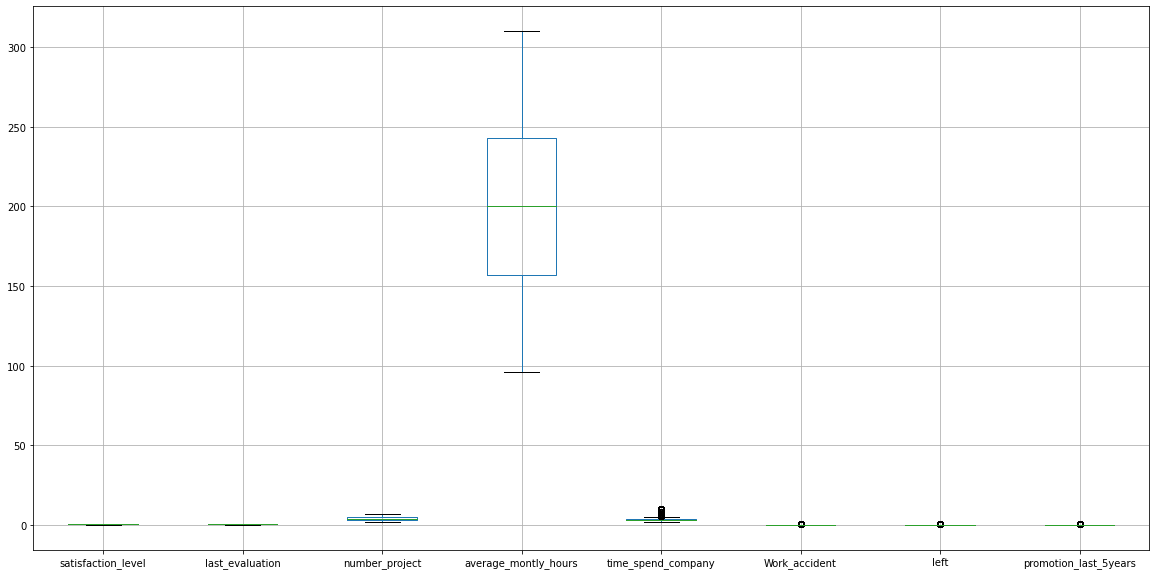

In [27]:
main_df.boxplot(figsize=(20,10))

<p>Dealing with outliers for the following numeric columns</p>
<ol>
<li>satisfaction level</li>
<li>last evaluation</li>
<li>average monthly hours</li>
<li>time spend company</li>
<li>number of projects</li>
</ol>
<p>Dealing with outliers for categorical columns is not advisable as they are as a result of class imbalance</p>

## Data Preparation

### Dealing with Categorical Columns

In [28]:
main_df.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [29]:
main_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
occupation                object
salary                    object
dtype: object

In [30]:
# creating a dataset to be used for visualization and analysis
visual_df = main_df.copy()

In [31]:
# preparing visual_df for clear visualization
visual_df.left = visual_df.left.map({0:'false', 1:'true'})
visual_df.Work_accident = visual_df.Work_accident.map({0:'false', 1:'true'})
visual_df.promotion_last_5years = visual_df.promotion_last_5years.map({0:'false', 1:'true'})

In [32]:
visual_df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,occupation,salary
553,0.79,1.00,5,257,6,false,true,false,sales,low
7518,0.85,0.55,5,182,3,false,false,false,technical,low
10347,0.89,0.91,3,264,3,true,false,false,technical,low
3446,0.67,0.44,5,212,4,false,false,false,sales,low
1598,0.83,0.94,5,273,5,false,true,false,RandD,medium


In [33]:
# using map to dummy encode the salary column
main_df.salary = main_df.salary.map({'low':0, 'medium':1, 'high':2})

In [34]:
# using map to dummy encode the occupation column
main_df.occupation = main_df.occupation.map({'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 
'management':5, 'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9})

In [35]:
main_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,occupation,salary
5233,0.48,0.68,4,163,2,1,0,0,3,0
3014,0.76,0.73,3,158,2,0,0,0,3,0
7015,0.63,0.43,2,222,4,0,0,0,7,2
1351,0.11,0.77,6,274,4,0,1,0,4,1
543,0.89,0.92,5,237,5,0,1,0,0,1
11372,0.98,0.74,3,185,3,0,0,0,0,1
73,0.09,0.87,7,295,4,0,1,0,7,0
2844,0.92,0.62,4,265,3,1,0,0,0,1
11199,0.84,0.85,4,207,10,0,0,0,0,0
10331,0.54,0.68,3,144,5,0,0,0,0,1


In [36]:
main_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'occupation', 'salary'],
      dtype='object')

In [37]:
# checking that all the columns are numerical
main_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
occupation                 int64
salary                     int64
dtype: object

## Explanatory Data Analysis

### Univariate Analysis

In [38]:
sns.set_style('darkgrid')

In [39]:
main_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,occupation,salary
left,,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500,3.391500,0.637600
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018,3.210447,0.434455


<p>The following attributes have impact on whether an employee will leave the comapany or not :</p>
<ol>
<li>Satisfaction Level</li>
<li>Average mothly hours</li>
<li>Work Accident</li>
</ol>

In [40]:
visual_df['left'].value_counts(normalize=True)

false    0.833959
true     0.166041
Name: left, dtype: float64

Text(0.5, 1.0, 'Employees who left the company')

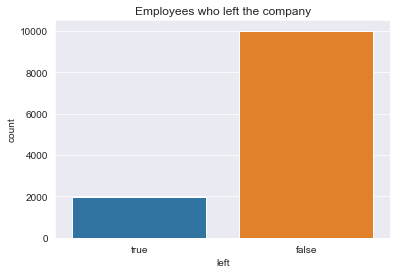

In [41]:
fig , ax = plt.subplots(figsize=(10,8))
sns.countplot(x = visual_df['left'],ax=ax)
plt.title('Employees who left the company',fontsize=20)
plt.xlabel('Employees who left the company',fontsize=15)
plt.ylabel('Number of employees',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
plt.savefig('left.png')

In [42]:
main_df['salary'].value_counts(normalize=True)

0    0.478692
1    0.438746
2    0.082562
Name: salary, dtype: float64

Text(0.5, 1.0, 'Salary distribution')

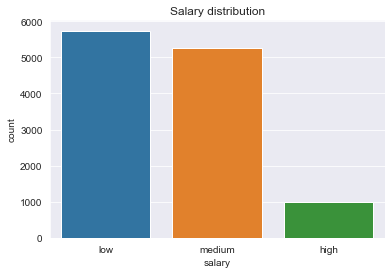

In [43]:
fig , ax = plt.subplots(figsize=(10,8))
sns.countplot(x = visual_df['salary'],ax=ax)
plt.title('Salary distribution',fontsize=20)
plt.xlabel('Salary',fontsize=15)
plt.ylabel('Number of employees',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
#plt.savefig('salary_distribution.png')

<p> Majority of the employees have low salary very few with high salaries</p>

In [44]:
visual_df['occupation'].value_counts(normalize=False)

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: occupation, dtype: int64

Text(0.5, 1.0, 'Occupation distribution')

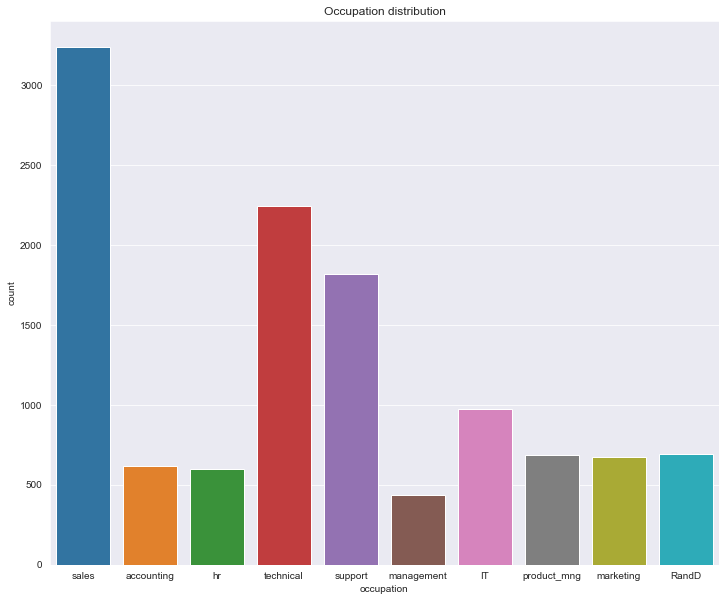

In [45]:
fig , ax = plt.subplots(figsize=(12,10))
sns.countplot(x = visual_df['occupation'], ax=ax)
plt.title('Occupation distribution',fontsize=20)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Number of employees',fontsize=15)
plt.xticks(rotation=90)
plt.show()
#plt.savefig('Occupation distribution.png')

<p>A majority of people work as sales people </p>

In [46]:
visual_df['promotion_last_5years'].value_counts(normalize=True)

false    0.983071
true     0.016929
Name: promotion_last_5years, dtype: float64

In [47]:
pd.DataFrame(visual_df['promotion_last_5years'].groupby(visual_df['left']).value_counts())

promotion_last_5years
left  promotion_last_5years                       
false false                                   9805
      true                                     195
true  false                                   1983
      true                                       8

Text(0.5, 1.0, 'Promotion distribution')

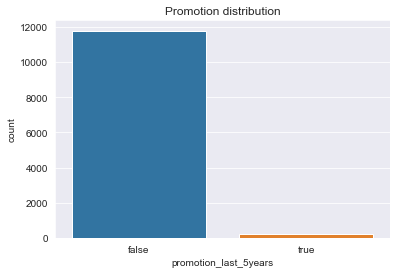

In [48]:
fig ,ax = plt.subplots(figsize=(10,8))
sns.countplot(x = visual_df['promotion_last_5years'],ax=ax)
plt.title('Promotion distribution',fontsize=20)
plt.xlabel('Promoted',fontsize=15)
plt.ylabel('Number of employees',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
#plt.savefig('Promotion distribution.png')

In [49]:
main_df['number_project'].value_counts(normalize=True)

4    0.307314
3    0.293553
5    0.186223
2    0.131932
6    0.068885
7    0.012092
Name: number_project, dtype: float64

Text(0, 0.5, 'Number of employees')

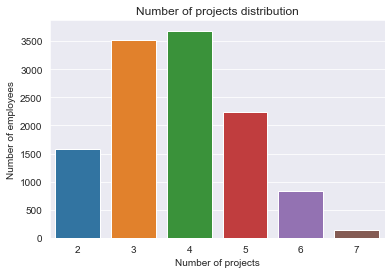

In [50]:
sns.countplot(x = main_df['number_project'])
plt.title('Number of projects distribution',fontsize=20)
plt.xlabel('Number of projects',fontsize=15)
plt.ylabel('Number of employees',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
#plt.savefig('Number of projects distribution.png')

<p>A majority of employees have worked on four work projects</p>

In [51]:
visual_df['Work_accident'].value_counts(normalize=True)

false    0.845718
true     0.154282
Name: Work_accident, dtype: float64

Text(0.5, 1.0, 'Work accident distribution')

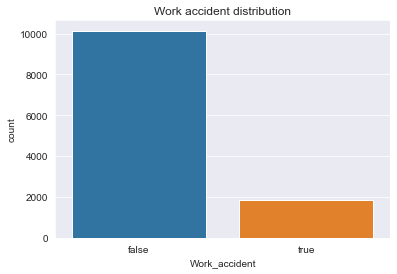

In [52]:
sns.countplot(x = visual_df['Work_accident'])
plt.title('Work accident distribution',fontsize=20)
plt.xlabel('Work accident',fontsize=15)
plt.ylabel('Number of employees',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
#plt.savefig('Work accident distribution.png')

array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:title={'center':'occupation'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

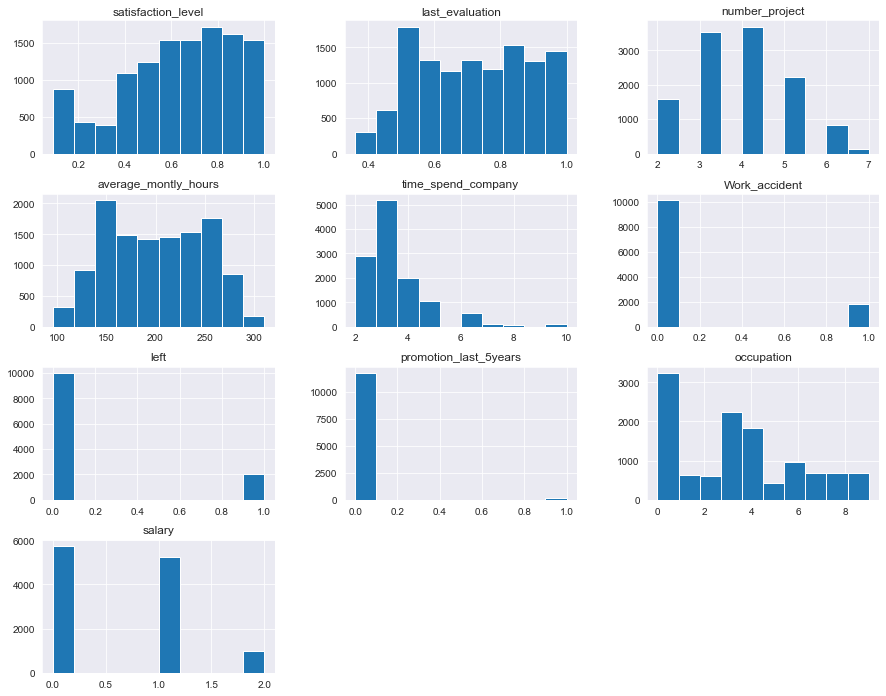

In [53]:
# checking the distribution of the data
main_df.hist(figsize=(15,12))

### Bivariate Analysis

Text(0, 0.5, 'Frequency of resignation')

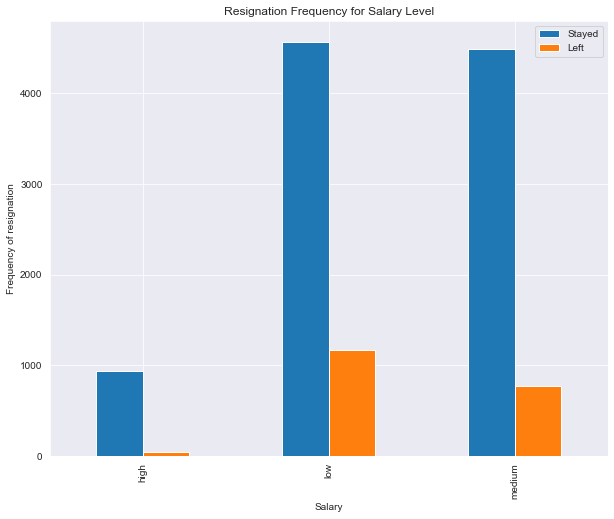

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
pd.crosstab(visual_df.salary,visual_df.left).plot(kind='bar',ax=ax).legend(['Stayed','Left'])
plt.title('Resignation Frequency for Salary Level')
plt.xlabel('Salary')
plt.ylabel('Frequency of resignation')
#plt.savefig('Resignation_frequency_salary')


In [55]:
pd.DataFrame(visual_df['salary'].groupby(visual_df['left']).value_counts())

salary
left  salary        
false low       4566
      medium    4492
      high       942
true  low       1174
      medium     769
      high        48

<p>Employees with high salary are the least likely to quit while those with low salary are the most likely to quit</p>

Text(0, 0.5, 'Frequency of resignation')

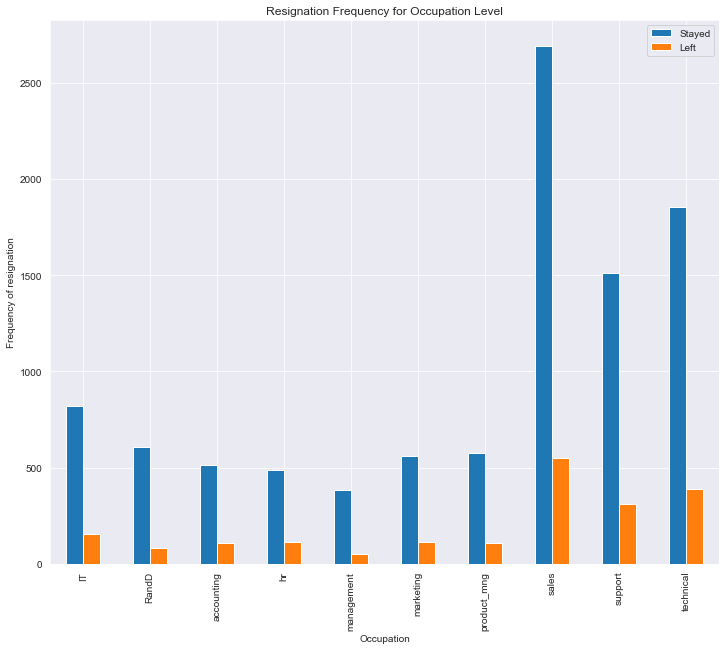

In [56]:
# visualizing the data
fig, ax = plt.subplots(figsize=(12, 10))
pd.crosstab(visual_df.occupation,visual_df.left).plot(kind='bar',ax=ax).legend(['Stayed','Left'])
plt.title('Resignation Frequency for Occupation Level')
plt.xlabel('Occupation')
plt.ylabel('Frequency of resignation')
#plt.savefig('Resignation_Frequency_for_Occupation_Level')

In [57]:
pd.DataFrame(visual_df['occupation'].groupby(visual_df['left']).value_counts())

occupation
left  occupation             
false sales              2689
      technical          1854
      support            1509
      IT                  818
      RandD               609
      product_mng         576
      marketing           561
      accounting          512
      hr                  488
      management          384
true  sales               550
      technical           390
      support             312
      IT                  158
      hr                  113
      marketing           112
      product_mng         110
      accounting          109
      RandD                85
      management           52

<p>coming soon</p>

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

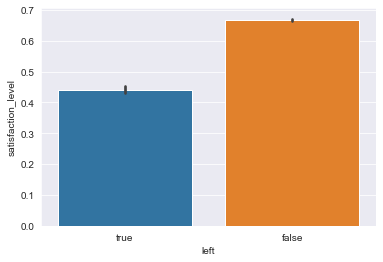

In [58]:
sns.barplot(x = 'left', y = 'satisfaction_level', data = visual_df)

In [ ]:
pd.DataFrame(visual_df['satisfaction_level'].groupby(visual_df['left']).value_counts())

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

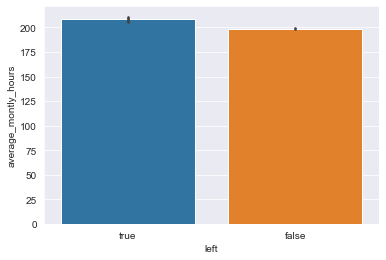

In [59]:
sns.barplot(x = 'left', y = 'average_montly_hours', data = visual_df)

In [ ]:
pd.DataFrame(visual_df['average_monthly_hours'].groupby(visual_df['left']).value_counts())

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

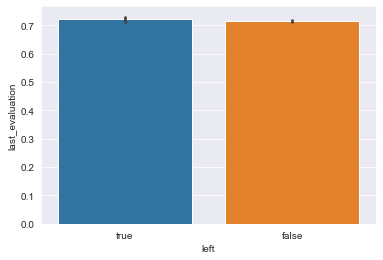

In [60]:
sns.barplot(x = 'left', y = 'last_evaluation', data = visual_df)

In [ ]:
pd.DataFrame(visual_df['last_evaluation'].groupby(visual_df['left']).value_counts())

<AxesSubplot:xlabel='left', ylabel='time_spend_company'>

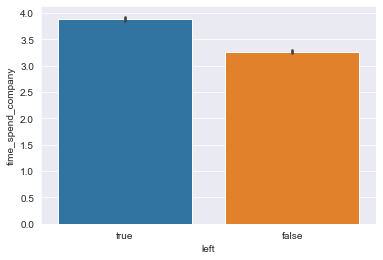

In [61]:
sns.barplot(x = 'left', y = 'time_spend_company', data = visual_df)

In [ ]:
pd.DataFrame(visual_df['time_spend_company'].groupby(visual_df['left']).value_counts())

<AxesSubplot:xlabel='left', ylabel='number_project'>

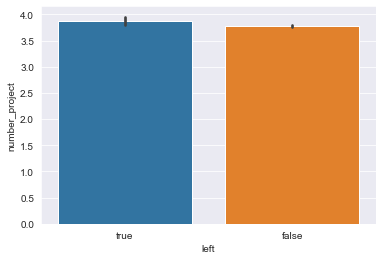

In [62]:
sns.barplot(x = 'left', y = 'number_project', data = visual_df)

In [ ]:
pd.DataFrame(visual_df['number_project'].groupby(visual_df['left']).value_counts())

In [65]:
main_df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,occupation,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.005716,0.029241
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.009266,-0.015775
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.005870,-0.000502
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,-0.000095,-0.000551
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.003698,0.038164
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.010891,-0.000058
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.023835,-0.118882
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.017525,0.087851
occupation,0.005716,0.009266,0.005870,-0.000095,0.003698,0.010891,-0.023835,0.017525,1.000000,0.016557
salary,0.029241,-0.015775,-0.000502,-0.000551,0.038164,-0.000058,-0.118882,0.087851,0.016557,1.000000


### Multivariate Analysis

<AxesSubplot:>

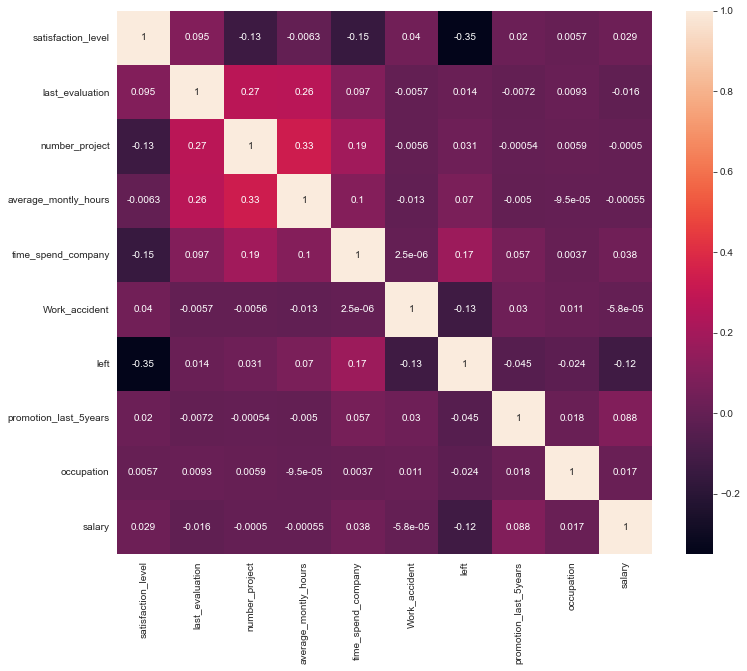

In [66]:
fig , ax = plt.subplots(figsize=(12,10))
sns.heatmap(main_df.corr(), annot=True ,ax=ax)

## Data Preprocessing 

In [67]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   occupation             11991 non-null  int64  
 9   salary                 11991 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.3 MB


In [69]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
main_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','occupation']] = scaler.fit_transform(main_df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','occupation']])
main_df.sample(5)

# dealing with class imbalance with SMOTE
# implementing the SMOTE algorithm to handle unbalanced data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1, sampling_strategy='minority')
X = main_df.drop(['left','Work_accident','promotion_last_5years'],axis=1)
y = main_df['left']
X,y = sm.fit_resample(X,y)
print(X.shape,y.shape)


(20000, 7) (20000,)


In [70]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X = main_df.drop('left', axis=1)
y = main_df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Modelling

In [77]:
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# importing the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# importing the cross validation
from sklearn.model_selection import cross_val_score

# importing the hyperparameter tuning
from sklearn.model_selection import GridSearchCV


import model_evaluation_utils as meu


In [87]:
# creating a function to fit and evaluate the models
def fit_and_evaluate(model):
    # fit the model
    model.fit(X_train, y_train)
    # predict the values
    y_pred = model.predict(X_test)
    # evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification = classification_report(y_test, y_pred)
    # return the values
    return print('Accuracy: ',accuracy,'\n\n','Confusion Matrix: \n [[TP , FP] \n [FN , TN]]\n\n',confusion,'\n\n','Classification Report:',classification)
    
    

# creating a function to cross validate the models
def cross_validate(model):
    # cross validate the model
    score = cross_val_score(model, X_train, y_train, cv=5)
    # return the values
    return score

# creating a function to tune the hyperparameters
def hyperparameter_tuning(model, params):
    # tune the hyperparameters
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    # return the values
    return grid.best_params_

### Baseline Model

In [88]:
# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state = 42)
fit_and_evaluate(baseline_model)

Accuracy:  0.8322214809873248 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[2415   86]
 [ 417   80]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.85      0.97      0.91      2501
           1       0.48      0.16      0.24       497

    accuracy                           0.83      2998
   macro avg       0.67      0.56      0.57      2998
weighted avg       0.79      0.83      0.80      2998



In [76]:
cross_validate(baseline_model)

array([0.82490272, 0.82712618, 0.82879377, 0.82647386, 0.83926585])

In [91]:
baseline_model_params = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "C": np.logspace(-4, 4, 20),
}

In [92]:
hyperparameter_tuning(baseline_model, params=baseline_model_params)

/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}

In [93]:
log_tuned_model = LogisticRegression(C=0.0001, penalty='l2', solver='liblinear')
fit_and_evaluate(log_tuned_model)

Accuracy:  0.8462308205470314 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[2476   25]
 [ 436   61]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.85      0.99      0.91      2501
           1       0.71      0.12      0.21       497

    accuracy                           0.85      2998
   macro avg       0.78      0.56      0.56      2998
weighted avg       0.83      0.85      0.80      2998



In [94]:
cross_validate(log_tuned_model)

array([0.84602557, 0.84991662, 0.84991662, 0.84760845, 0.85205784])

<p> After tuning the baseline model the overall accuracy increased from 83% to 85%, however ,the model still does not perform to satisfactory level on the minority class </p>

### Decision Tree Model

In [89]:
# instantiate a decision tree model
tree_model = DecisionTreeClassifier(random_state = 42)
fit_and_evaluate(tree_model)

Accuracy:  0.9653102068045364 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[2441   60]
 [  44  453]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2501
           1       0.88      0.91      0.90       497

    accuracy                           0.97      2998
   macro avg       0.93      0.94      0.94      2998
weighted avg       0.97      0.97      0.97      2998



In [78]:
cross_validate(tree_model)

array([0.96942746, 0.96831573, 0.96775987, 0.96829811, 0.96941046])

In [96]:
tree_model_params = {
    "criterion": ['gini', 'entropy'],
    "splitter": ['best', 'random'],
    "max_depth": [int(x) for x in np.linspace(10, 110, num = 11)],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['auto', 'sqrt', 'log2']
} 

In [97]:
hyperparameter_tuning(tree_model, params=tree_model_params)

/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To 

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [98]:
tree_tuned_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=5, splitter='best')
fit_and_evaluate(tree_tuned_model)

Accuracy:  0.9783188792528352 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[2486   15]
 [  50  447]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2501
           1       0.97      0.90      0.93       497

    accuracy                           0.98      2998
   macro avg       0.97      0.95      0.96      2998
weighted avg       0.98      0.98      0.98      2998



/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [99]:
cross_validate(tree_tuned_model)

/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To 

array([0.97887715, 0.96942746, 0.9766537 , 0.97942158, 0.98275862])

<p> The Accuracy metrics increased from 97% on the base tree model to 98% on the tuned tree model</p>
<p> The decision tree classifier performs relatively well on its  base model and performs even better after Hyperparameter tuning with both the minority and majority class with precision, recall metrics all above 0.9.</p>

### Random Forest Model

In [100]:
# instantiate a Random Forest model
forest_model = RandomForestClassifier(random_state = 42)
fit_and_evaluate(forest_model)

Accuracy:  0.9829886591060707 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[2494    7]
 [  44  453]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2501
           1       0.98      0.91      0.95       497

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [101]:
cross_validate(forest_model)

array([0.98554753, 0.98332407, 0.98499166, 0.98665184, 0.98720801])

In [105]:
forest_params = {
    "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    "max_features": ['auto', 'sqrt'],
    "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [107]:
#hyperparameter_tuning(forest_model, params=forest_params)

In [108]:
forest_tuned_model = RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=70, bootstrap=True)
fit_and_evaluate(forest_tuned_model)

/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy:  0.9829886591060707 

 Confusion Matrix: 
 [[TP , FP] 
 [FN , TN]]

 [[2494    7]
 [  44  453]] 

 Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2501
           1       0.98      0.91      0.95       497

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [109]:
cross_validate(forest_tuned_model)

/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/oscar/opt/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

array([0.98499166, 0.98332407, 0.98554753, 0.98665184, 0.98720801])

<p>  The Accuracy metrics increased from 98% on the base forest model to 99% on the tuned forest model</p>
<p></p>

In [124]:
# Making predictions on unseen data
def Make_prediction():
    print('Enter the following details to predict the employee retention')
    satisfaction_level = float(input('Enter the satisfaction level: range from 0 to 1: '))
    last_evaluation = float(input('Enter how the employee feels about the last evaluation: rate between 0 and 1: '))
    number_project = int(input('Enter the number of projects employee has worked on: '))
    average_montly_hours = int(input('Enter the employees average monthly hours: '))
    time_spend_company = int(input('Enter the employees time spend in the company: '))
    Work_accident = int(input('Enter the work accident: 0 for No and 1 for Yes: '))
    promotion_last_5years = int(input('Enter if employee has had a promotion in the last 5 years: 0: No, 1: Yes '))
    salary = input('Enter the salary as high/medium/low: ')
    occupation = int(input("Enter the occupation 'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5, 'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9"))
    # creating a dictionary
    data = {
        'satisfaction_level': satisfaction_level,
        'last_evaluation': last_evaluation,
        'number_project': number_project,
        'average_montly_hours': average_montly_hours,
        'time_spend_company': time_spend_company,
        'Work_accident': Work_accident,
        'promotion_last_5years': promotion_last_5years,
        'salary': salary,
        'occupation': occupation
    }
    # creating a dataframe
    df = pd.DataFrame(data, index=[0])
    # encoding the salary column
    df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})
    # feature scaling
    df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','occupation']] = scaler.transform(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company','occupation']])
    # predicting the values
    prediction = forest_tuned_model.predict(df)
    # return the values
    return print('The employee will leave the company: (0 for True and 1 for False):  ',prediction[0])

In [ ]:
Make_prediction()

## Conclusions

<p></p>
<ol>
<li></li>
<li></li>
<li></li>
<li></li>
<li></li>
</ol>